# Boot

In [1]:
!pip install -U git+https://github.com/AndressaStefany/evolving_systems

  Cloning https://github.com/AndressaStefany/evolving_systems to /tmp/pip-req-build-fcd7ouez
  Running command git clone -q https://github.com/AndressaStefany/evolving_systems /tmp/pip-req-build-fcd7ouez
  Created wheel for evolvingsystems: filename=evolvingsystems-0.1-cp36-none-any.whl size=18838 sha256=fa5c3f39e08383279108c2905f7ce5253bd8b0723fbf318bf33faf49e340991f
  Stored in directory: /tmp/pip-ephem-wheel-cache-lkbip2jv/wheels/e1/8c/20/90c8f2bc1d2adcfff98088c8773e120d9890220001e2cc7962
Successfully built evolvingsystems


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from algoritms.macro_sostream.Macro_SOStream import Macro_SOStream
from metrics.Metrics import purity, silhouette, adjusted_rand, precision, recall, f1

In [3]:
# random list of colors
import random
from sklearn.utils import shuffle

list_cor = []
for i in range(0,1000):
    r = lambda: random.randint(0,255)
    cor = '#%02X%02X%02X' % (r(),r(),r())
    list_cor.append(cor)

unique_list = np.array(list_cor)
unique_list = np.unique(unique_list)
list_cor_maior = unique_list
list_cor_maior = shuffle(list_cor_maior)

# Data

In [4]:
!wget https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/s-set1.arff

--2020-07-13 14:33:11--  https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/s-set1.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102051 (100K) [text/plain]
Saving to: ‘s-set1.arff’

s-set1.arff         100%[===================>]  99.66K  --.-KB/s    in 0.02s   

2020-07-13 14:33:12 (6.00 MB/s) - ‘s-set1.arff’ saved [102051/102051]



In [5]:
from scipy.io import arff

data = arff.loadarff('s-set1.arff')
df = pd.DataFrame(data[0])
df.CLASS = df.CLASS.astype(int)

df.head()

,x,y,CLASS
0,664159.0,550946.0,14
1,665845.0,557965.0,14
2,597173.0,575538.0,14
3,618600.0,551446.0,14
4,635690.0,608046.0,14


In [6]:
X = df.drop(['CLASS'],axis=1)
y_true = df['CLASS']

# Macro SOStream

In [7]:
lista_parametros = [{'alpha': 0.01, 
                     'min_pts':4, 
                     'merge_threshold':59900,
                     'p':1.5}]

alpha:  0.01 , min_pts:  4 , merge_threshold:  59900 , p:  1.5
Centroid count of list  0 :  4
Points number of centroid respective:  [1, 1, 1316, 1]
Centroid count of list  1 :  3
Points number of centroid respective:  [360, 332, 2989]


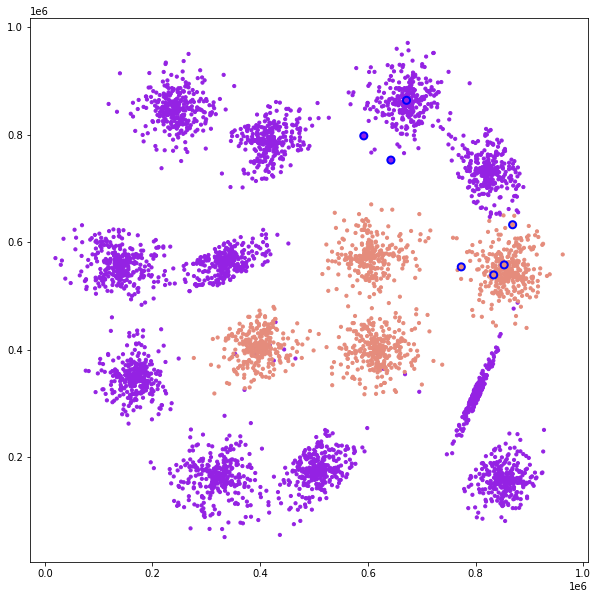

In [8]:
for icon in lista_parametros:
    macro_sostream = Macro_SOStream(alpha = icon['alpha'],
                                            min_pts = icon['min_pts'],
                                            merge_threshold = icon['merge_threshold'],
                                            p = icon['p'])
    print('alpha: ',icon['alpha'],', min_pts: ',icon['min_pts'],', merge_threshold: ',icon['merge_threshold'],', p: ', icon['p'])
    cont = 0
    x = [0] # points number
    y = [0] # centroids number
    macro_sostream.fit_predict(X)
 
    plt.figure(1,figsize=(10,10))
    s1_list = []
    s1_radius_list = []
    cor_centroid = []

    for idx,lista in enumerate(macro_sostream.lists):
        print('Centroid count of list ', idx,': ', len(lista[-1]))
        s1 = np.array([c.centroid for c in lista[-1]])
        print('Points number of centroid respective: ', [c.number_points for c in lista[-1]])
        cor = np.array([idx for c in lista[-1]])
        s1_radius = np.array([c.radius for c in lista[-1]])

        s1_list.extend(s1)
        s1_radius_list.extend(s1_radius)
        cor_centroid.extend(cor*5)

    array = [c*5 for c in macro_sostream.class_lists]

    plt.scatter(X.loc[:,'x'], X.loc[:,'y'],s=10, c=list_cor_maior[array])

    cor_cent = []
    for idx,lis in enumerate(s1_list):
        cor_cent_aux = [idx for i in lis]
        cor_cent.extend(cor_cent_aux)

    x = [p[0] for p in s1_list]
    y = [p[1] for p in s1_list]
    plt.scatter(x[:], y[:],s=50, c=list_cor_maior[cor_centroid], edgecolors='blue', linewidth=2)

    plt.show()

# Processing of y_pred data

In [9]:
df_y_pred = pd.DataFrame(macro_sostream.class_centroids, columns = ['x', 'y'])
df_y_pred['x+y'] = df_y_pred['x'].astype(str)+'_'+df_y_pred['y'].astype(str)

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

df_y_pred['CLASS'] = labelencoder_X.fit_transform(df_y_pred.values[:, 2])
df_y_pred = df_y_pred.drop(columns=['x+y'])
y_pred = df_y_pred['CLASS']

In [10]:
print(y_pred.unique())
print(y_true.unique())

[4 0 1 6 3 5 2]
[14 13  3  6  1  5  4 15  8  9  7 12  0 10 11]


In [11]:
# calculations take into account the class number
y_pred_copy = y_pred.copy()
y_pred_copy = y_pred_copy.replace(4, 14)
y_pred_copy = y_pred_copy.replace(0, 13)
y_pred_copy = y_pred_copy.replace(1, 10)
y_pred_copy = y_pred_copy.replace(3, 1)
y_pred_copy = y_pred_copy.replace(10, 3)
y_pred_copy = y_pred_copy.replace(2, 4)

In [12]:
print("Silhouette Coefficient: %10.4f" % (silhouette(X.values, y_pred)))
print("Adjusted Rand index: %10.4f" % (adjusted_rand(y_true, y_pred)))
print("Purity: %10.4f" % (purity(y_true, y_pred)))

# Consider the label of the clusters
print("\n")
print("Precision: %10.4f" % (precision(y_true, y_pred)))
print("Precision: %10.4f" % (precision(y_true, y_pred_copy)))
print("Recall: %10.4f" % (recall(y_true, y_pred)))
print("Recall: %10.4f" % (recall(y_true, y_pred_copy)))
print("F1-Score: %10.4f" % (f1(y_true, y_pred)))
print("F1-Score: %10.4f" % (f1(y_true, y_pred_copy)))

Silhouette Coefficient:    -0.1317
Adjusted Rand index:     0.1627
Purity:     0.2750


Precision:     0.0682
Precision:     0.1270
Recall:     0.0682
Recall:     0.1270
F1-Score:     0.0682
F1-Score:     0.1270
